## 上周我们的数据统计结果如下


| Column id        | Example value                                    | Different Value types |
| ---------------- | ------------------------------------------------ | --------------------- |
| id               | 5.21159374e+11                                   | 40428967              |
| click            | 0,1                                              | 2                     |
| hour             | 14102100 14102101                                | 240                   |
| C1               | 1001 1002 1005 1007 1008 1010 1012               | 7                     |
| banner_pos       | 0 1 2 3 4 5 7                                    | 8                     |
| site_id          | '000aa1a4' ' ... 'fffe8e1c'                      | 4737                  |
| site_domain      | '004d30ed' ... 'ffdec903'                        | 7745                  |
| site_category    | '0569f928' …'f66779e6'                           | 26                    |
| app_id           | '000d6291' ... 'ffef3b38'                        | 8552                  |
| app_domain       | 'fea0d84a'…'ff6630e0'                            | 559                   |
| app_category     | 'd1327cf5' …'fc6fa53d'                           | 36                    |
| device_id        | '00000919' ... 'ffffde2c'                        | 2686408               |
| device_ip        | '00000911' ... 'fffff971'                        | 6729486               |
| device_model     | '000ab70c' ... 'ffe72be2'                        | 8251                  |
| device_type­­­   | 0 1 2 4 5                                        | 5                     |
| device_conn_type | 0 2 3 5                                          | 4                     |
| C14              | 375 ... 24052                                    | 2626                  |
| C15              | 120    216  300  320    480  728  768 1024       | 8                     |
| C16              | 20     36   50   90    250  320  480    768 1024 | 9                     |
| C17              | 112…2758                                         | 435                   |
| C18              | 0 1 2 3                                          | 4                     |
| C19              | 33…1959                                          | 68                    |
| C20              | -1 100000 100001…100248                          | 172                   |
| C21              | 1 … 219                                          | 60                    |

合上述综合分析，筛选出以下特征作为训练特征：

|      | 筛选出来的特征   | 数值类型 | 独一数   | 特征处理                                |
| ---- | ---------------- | -------- | -------- | --------------------------------------- |
| 1    | C1               | 数值型   | 7        | 类别化                                  |
| 2    | banner_pos       | 数值型   | 7        | 类别化                                  |
| 3    | device_type      | 数值型   | 5        | 不作处理                                |
| 4    | device_conn_type | 数值型   | 4        | 不作处理                                |
| 5    | C17              | 数值型   | 435      | 不作处理                                |
| 6    | C15              | 数值型   | 8        | C15XC16合并为一个特征                   |
| 7    | C16              | 数值型   | 9        | C15XC16合并为一个特征                   |
| 8    | C18              | 数值型   | 4        | 不作处理                                |
| 9    | C19              | 数值型   | 68       | 不作处理                                |
| 10   | C20              | 数值型   | 172      | 不作处理                                |
| 11   | C21              | 数值型   | 60       | 不作处理                                |
| 12   | hour             | 时间型   | 40428967 | 分段汇总，类别化或转化为连续变量        |
| 13   | site_category    | 类别型   | 26       | labelencoder 或者hash                   |
| 14   | app_domain       | 类别型   | 559      | labelencoder 或者hash                   |
| 15   | app_category     | 类别型   | 36       | labelencoder 或者hash                   |
| 16   | device_model     | 类别型   | 8251     | labelencoder 或者hash                   |
| 17   | device_id        | 类别型   | 2686408  | device_id+device_ip，hash后作为代表用户 |
| 18   | device_ip        | 类别型   | 6729486  | device_id+device_ip，hash后作为代表用户 |



而id，app_id, site_id, site_domain，C14将直接舍弃。

In [2]:
import pandas as pd

### 想将点击率针对于每一个特征的后验概率加入到特征中

In [18]:
path = 'data/train_info/'

## 特征编码

In [5]:
#保留的特征：
feature_list = ['hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']

In [12]:
train_file = pd.read_csv('data/train_1.csv')

In [14]:
train_file.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.005585e+19,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,...,1,0,20596,320,50,2161,0,35,-1,157
1,1.010206e+19,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,...,1,0,18648,320,50,1092,3,1835,100156,61
2,1.020168e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15703,320,50,1722,0,35,-1,79
3,1.025000e+19,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15702,320,50,1722,0,35,100084,79
4,1.052369e+19,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,...,1,0,20596,320,50,2161,0,35,100148,157


In [5]:
test_file = pd.read_csv('data/test')
columns = test_file.columns
for column in columns:
    data_single_col = pd.read_csv('data/test', usecols = [column])
    unique_vals = np.unique(data_single_col)
    print(unique_vals)

NameError: name 'np' is not defined

In [21]:
hour_rate = pd.read_csv(path+'clickVShour.csv', usecols=['hour','avg(click)'])

In [22]:
hour_rate.head()

,hour,avg(click)
0,14102100,0.174714
1,14102101,0.173695
2,14102102,0.150696
3,14102103,0.169791
4,14102104,0.151206


In [23]:
tran1 = pd.merge(train_file, hour_rate)

In [27]:
tran1.rename(columns={'avg(click)':'hour_rate'}, inplace = True)

In [28]:
tran1.tail()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,hour_rate
100980,9.766275e+18,1,14103023,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0,22676,320,50,2616,0,35,100084,51,0.168836
100981,9.829227e+18,1,14103023,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0,22676,320,50,2616,0,35,-1,51,0.168836
100982,9.877575e+18,0,14103023,1005,0,85f751fd,c4e18dd6,50e219e0,7e7baafa,2347f47a,...,0,23866,320,50,2736,0,33,100170,246,0.168836
100983,9.911338e+18,0,14103023,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,...,0,23161,320,50,2667,0,47,-1,221,0.168836
100984,9.945913e+17,0,14103023,1005,0,85f751fd,c4e18dd6,50e219e0,54c5d545,2347f47a,...,2,17017,320,50,1873,3,39,-1,23,0.168836


### 将所有特征的后验概率加入到训练数据集中，并替换掉原来的特征

In [31]:
train_rate = pd.read_csv('data/train_1.csv') 
feature_list = ['hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
for column in feature_list:
    rate = pd.read_csv(path+'clickVS'+column+'.csv', usecols=[column,'avg(click)'])
    train_rate = pd.merge(train_rate,rate)
    train_rate.rename(columns={'avg(click)':column+'_rate'}, inplace = True)
    train_rate.drop([column],inplace = True, axis=1)

       hour  avg(click)
0  14102100    0.174714
1  14102101    0.173695
2  14102102    0.150696
3  14102103    0.169791
4  14102104    0.151206
             id  click      hour    C1  banner_pos   site_id site_domain  \
0  1.005585e+19      0  14102100  1005           0  85f751fd    c4e18dd6   
1  1.010206e+19      0  14102100  1005           0  85f751fd    c4e18dd6   
2  1.020168e+19      0  14102100  1005           0  1fbe01fe    f3845767   
3  1.025000e+19      1  14102100  1005           0  1fbe01fe    f3845767   
4  1.052369e+19      0  14102100  1005           0  85f751fd    c4e18dd6   

  site_category    app_id app_domain     ...     device_conn_type    C14  C15  \
0      50e219e0  0acbeaa3   45a51db4     ...                    0  20596  320   
1      50e219e0  51cedd4e   aefc06bd     ...                    0  18648  320   
2      28905ebd  ecad2386   7801e8d9     ...                    0  15703  320   
3      28905ebd  ecad2386   7801e8d9     ...                    2  15702  3

             id  click site_domain site_category    app_id app_domain  \
0  1.005585e+19      0    c4e18dd6      50e219e0  0acbeaa3   45a51db4   
1  1.010206e+19      0    c4e18dd6      50e219e0  51cedd4e   aefc06bd   
2  1.052369e+19      0    c4e18dd6      50e219e0  0acbeaa3   45a51db4   
3  1.066172e+19      0    c4e18dd6      50e219e0  5adb10d9   2347f47a   
4  1.113486e+19      0    c4e18dd6      50e219e0  d33d55c4   d9b5648e   

  app_category device_id device_ip device_model     ...       C17  C18   C19  \
0     f95efa07  a99f214a  7db30ee7     9f8d0424     ...      2161    0    35   
1     0f2161f8  a99f214a  50d510f0     bbeedfee     ...      1092    3  1835   
2     f95efa07  a99f214a  bbeeb866     fce66524     ...      2161    0    35   
3     cef3e649  140e83db  f9c89d31     dc356277     ...      2161    0    35   
4     0f2161f8  a99f214a  8e6260e5     d056b4bf     ...      2434    3   163   

      C20  C21  hour_rate   C1_rate  banner_pos_rate  site_id_rate  avg(click)  

             id  click    app_id app_domain app_category device_id device_ip  \
0  1.005585e+19      0  0acbeaa3   45a51db4     f95efa07  a99f214a  7db30ee7   
1  1.052369e+19      0  0acbeaa3   45a51db4     f95efa07  a99f214a  bbeeb866   
2  2.566852e+18      0  0acbeaa3   45a51db4     f95efa07  a99f214a  74e435bd   
3  1.391783e+19      0  0acbeaa3   45a51db4     f95efa07  a99f214a  1ecc23fa   
4  1.631158e+19      0  0acbeaa3   45a51db4     f95efa07  a99f214a  1e94c42f   

  device_model  device_type  device_conn_type     ...      C19     C20  C21  \
0     9f8d0424            1                 0     ...       35      -1  157   
1     fce66524            1                 0     ...       35  100148  157   
2     5e12edef            1                 0     ...       35  100034  157   
3     7fe9fa2c            1                 0     ...       35  100034  157   
4     405444ca            1                 0     ...      547      -1   51   

   hour_rate   C1_rate  banner_pos_rate  sit

             id  click app_category device_id device_ip device_model  \
0  1.005585e+19      0     f95efa07  a99f214a  7db30ee7     9f8d0424   
1  1.052369e+19      0     f95efa07  a99f214a  bbeeb866     fce66524   
2  2.566852e+18      0     f95efa07  a99f214a  74e435bd     5e12edef   
3  1.391783e+19      0     f95efa07  a99f214a  1ecc23fa     7fe9fa2c   
4  1.631158e+19      0     f95efa07  a99f214a  1e94c42f     405444ca   

   device_type  device_conn_type    C14  C15       ...            C20  C21  \
0            1                 0  20596  320       ...             -1  157   
1            1                 0  20596  320       ...         100148  157   
2            1                 0  18993  320       ...         100034  157   
3            1                 0  20596  320       ...         100034  157   
4            1                 0  21647  320       ...             -1   51   

   hour_rate   C1_rate  banner_pos_rate  site_id_rate  site_domain_rate  \
0   0.174714  0.169331 

  device_ip  avg(click)
0  0000016d         0.0
1  00000262         0.0
2  00000911         0.0
3  000009d4         0.0
4  00000a61         1.0
             id  click device_ip device_model  device_type  device_conn_type  \
0  1.005585e+19      0  7db30ee7     9f8d0424            1                 0   
1  1.052369e+19      0  bbeeb866     fce66524            1                 0   
2  2.566852e+18      0  74e435bd     5e12edef            1                 0   
3  1.391783e+19      0  1ecc23fa     7fe9fa2c            1                 0   
4  1.631158e+19      0  1e94c42f     405444ca            1                 0   

     C14  C15  C16   C17     ...       C1_rate  banner_pos_rate  site_id_rate  \
0  20596  320   50  2161     ...      0.169331         0.164272      0.118826   
1  20596  320   50  2161     ...      0.169331         0.164272      0.118826   
2  18993  320   50  2161     ...      0.169331         0.164272      0.118826   
3  20596  320   50  2161     ...      0.169331     

             id  click  device_type  device_conn_type    C14  C15  C16   C17  \
0  1.005585e+19      0            1                 0  20596  320   50  2161   
1  9.076250e+16      1            1                 0  20215  320   50  2316   
2  1.449938e+19      0            1                 0  20362  320   50  2333   
3  1.352463e+19      0            1                 0  20391  320   50  2340   
4  6.837967e+18      0            1                 0  20596  320   50  2161   

   C18   C19        ...         site_id_rate  site_domain_rate  \
0    0    35        ...             0.118826           0.12275   
1    0   167        ...             0.118826           0.12275   
2    0    39        ...             0.118826           0.12275   
3    3  1065        ...             0.118826           0.12275   
4    0    35        ...             0.118826           0.12275   

   site_category_rate  app_id_rate  app_domain_rate  app_category_rate  \
0             0.12858     0.201129         0.201

             id  click  C15  C16   C17  C18  C19     C20  C21  hour_rate  \
0  1.005585e+19      0  320   50  2161    0   35      -1  157   0.174714   
1  6.837967e+18      0  320   50  2161    0   35  100212  157   0.173695   
2  1.052369e+19      0  320   50  2161    0   35  100148  157   0.174714   
3  1.391783e+19      0  320   50  2161    0   35  100034  157   0.173695   
4  1.503958e+19      0  320   50  2161    0   35      -1  157   0.150696   

      ...      app_id_rate  app_domain_rate  app_category_rate  \
0     ...         0.201129         0.201129           0.247588   
1     ...         0.057178         0.194877           0.108118   
2     ...         0.201129         0.201129           0.247588   
3     ...         0.201129         0.201129           0.247588   
4     ...         0.201129         0.201129           0.247588   

   device_id_rate  device_ip_rate  device_model_rate  device_type_rate  \
0        0.174152             0.0           0.152539          0.169176  

             id  click   C17  C18  C19     C20  C21  hour_rate   C1_rate  \
0  1.005585e+19      0  2161    0   35      -1  157   0.174714  0.169331   
1  6.837967e+18      0  2161    0   35  100212  157   0.173695  0.169331   
2  1.052369e+19      0  2161    0   35  100148  157   0.174714  0.169331   
3  1.391783e+19      0  2161    0   35  100034  157   0.173695  0.169331   
4  1.503958e+19      0  2161    0   35      -1  157   0.150696  0.169331   

   banner_pos_rate    ...     app_category_rate  device_id_rate  \
0         0.164272    ...              0.247588        0.174152   
1         0.164272    ...              0.108118        0.174152   
2         0.164272    ...              0.247588        0.174152   
3         0.164272    ...              0.247588        0.174152   
4         0.164272    ...              0.247588        0.174152   

   device_ip_rate  device_model_rate  device_type_rate  device_conn_type_rate  \
0             0.0           0.152539          0.169176     

             id  click  C19     C20  C21  hour_rate   C1_rate  \
0  1.005585e+19      0   35      -1  157   0.174714  0.169331   
1  6.837967e+18      0   35  100212  157   0.173695  0.169331   
2  1.052369e+19      0   35  100148  157   0.174714  0.169331   
3  1.391783e+19      0   35  100034  157   0.173695  0.169331   
4  1.503958e+19      0   35      -1  157   0.150696  0.169331   

   banner_pos_rate  site_id_rate  site_domain_rate    ...     device_ip_rate  \
0         0.164272      0.118826           0.12275    ...                0.0   
1         0.164272      0.118826           0.12275    ...                0.0   
2         0.164272      0.118826           0.12275    ...                0.0   
3         0.164272      0.118826           0.12275    ...                0.0   
4         0.164272      0.118826           0.12275    ...                0.0   

   device_model_rate  device_type_rate  device_conn_type_rate  C14_rate  \
0           0.152539          0.169176               

             id  click  C21  hour_rate   C1_rate  banner_pos_rate  \
0  1.005585e+19      0  157   0.174714  0.169331         0.164272   
1  1.503958e+19      0  157   0.150696  0.169331         0.164272   
2  4.861583e+18      0  157   0.174714  0.169331         0.183614   
3  6.567762e+18      0  157   0.173695  0.169331         0.164272   
4  1.527897e+19      0  157   0.151206  0.169331         0.164272   

   site_id_rate  site_domain_rate  site_category_rate  app_id_rate    ...     \
0      0.118826          0.122750            0.128580     0.201129    ...      
1      0.118826          0.122750            0.128580     0.201129    ...      
2      0.078899          0.078899            0.179579     0.198610    ...      
3      0.076090          0.076090            0.179579     0.198610    ...      
4      0.118826          0.122750            0.128580     0.077611    ...      

   device_type_rate  device_conn_type_rate  C14_rate  C15_rate  C16_rate  \
0          0.169176         

In [32]:
train_rate.to_csv('data/train_rate.csv',index=False)

## 模型训练 

In [3]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
lr= LogisticRegression()

In [4]:
train = pd.read_csv('data/train_rate.csv')
y_train = train['click']   #形式为Class_x
train = train.drop(['click'], axis=1)
X_train = np.array(train)


In [39]:
print(train.head())

             id  hour_rate   C1_rate  banner_pos_rate  site_id_rate  \
0  1.005585e+19   0.174714  0.169331         0.164272      0.118826   
1  1.503958e+19   0.150696  0.169331         0.164272      0.118826   
2  4.861583e+18   0.174714  0.169331         0.183614      0.078899   
3  6.567762e+18   0.173695  0.169331         0.164272      0.076090   
4  1.527897e+19   0.151206  0.169331         0.164272      0.118826   

   site_domain_rate  site_category_rate  app_id_rate  app_domain_rate  \
0          0.122750            0.128580     0.201129         0.201129   
1          0.122750            0.128580     0.201129         0.201129   
2          0.078899            0.179579     0.198610         0.194877   
3          0.076090            0.179579     0.198610         0.194877   
4          0.122750            0.128580     0.077611         0.194877   

   app_category_rate    ...     device_type_rate  device_conn_type_rate  \
0           0.247588    ...             0.169176           

In [5]:
from sklearn.cross_validation import cross_val_score
loss = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_log_loss')
print('logloss of each fold is: ',-loss)
print('cv logloss is:', -loss.mean())

/Users/feixie/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


logloss of each fold is:  [0.51172749 0.50821552 0.51138838 0.5117736  0.50705172]
cv logloss is: 0.5100313410040963


In [6]:
### 正则化的 Logistic Regression及参数调优

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#需要调优的参数
# 请尝试将L1正则和L2正则分开，并配合合适的优化求解算法（slover）
#tuned_parameters = {'penalty':['l1','l2'],
#                   'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
#                   }
penaltys = ['l1','l2']
Cs = [0.001, 0.01, 0.1]
tuned_parameters = dict(penalty = penaltys, C = Cs)

lr_penalty= LogisticRegression()
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5, scoring='neg_log_loss')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

#### 6：55

In [8]:
# view the complete results (list of named tuples)
grid.cv_results_

/Users/feixie/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/feixie/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/feixie/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/feixie/anaconda3/lib/py

{'mean_fit_time': array([2.72261087e+02, 1.56537533e-01, 2.56909485e+02, 1.50077152e-01,
        1.29515524e+02, 1.51040411e-01]),
 'mean_score_time': array([0.00545583, 0.00762744, 0.00547543, 0.00697789, 0.00585942,
        0.00714774]),
 'mean_test_score': array([-0.35312097, -0.51003139, -0.31188179, -0.51003139, -0.32254632,
        -0.51003139]),
 'mean_train_score': array([-0.35257568, -0.51002551, -0.30160881, -0.51002551, -0.29662265,
        -0.51002551]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001, 'penalty': 'l1'},
  {'C': 0.001, 'penalty': 'l2'},
  {'C': 0.01, 'penalty': 'l1'},
  {'C': 0.01, 'penalty': 'l2'},
  {'C': 0.1, 'pen

In [9]:
# examine the best model
print(-grid.best_score_)
print(grid.best_params_)

0.31188178822656837
{'C': 0.01, 'penalty': 'l1'}


/Users/feixie/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/feixie/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


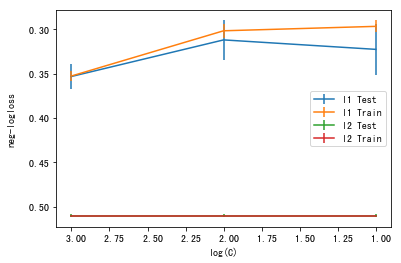

In [12]:

import matplotlib.pyplot as pyplot
import seaborn as sns

%matplotlib inline
# plot CV误差曲线
test_means = grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]
train_means = grid.cv_results_[ 'mean_train_score' ]
train_stds = grid.cv_results_[ 'std_train_score' ]


# plot results
n_Cs = len(Cs)
number_penaltys = len(penaltys)
test_scores = np.array(test_means).reshape(n_Cs,number_penaltys)
train_scores = np.array(train_means).reshape(n_Cs,number_penaltys)
test_stds = np.array(test_stds).reshape(n_Cs,number_penaltys)
train_stds = np.array(train_stds).reshape(n_Cs,number_penaltys)

x_axis = np.log10(Cs)
for i, value in enumerate(penaltys):
    #pyplot.plot(log(Cs), test_scores[i], label= 'penalty:'   + str(value))
    pyplot.errorbar(x_axis, test_scores[:,i], yerr=test_stds[:,i] ,label = penaltys[i] +' Test')
    pyplot.errorbar(x_axis, train_scores[:,i], yerr=train_stds[:,i] ,label = penaltys[i] +' Train')
    
pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'neg-logloss' )
pyplot.savefig('LogisticGridSearchCV_C.png' )

pyplot.show()

In [ ]:
lr_tuned = LogisticRegression(penalty=’l1’, C=0.01,  solver=’saga’, verbose=100, n_jobs=-1)

In [20]:
from sklearn.linear_model import LogisticRegressionCV

Cs = [0.01]

# 大量样本（6W+）、高维度（93），L2正则 --> 缺省用lbfgs
# LogisticRegressionCV比GridSearchCV快
lrcv_L2 = LogisticRegressionCV(Cs= Cs, cv = 5, scoring='neg_log_loss', 
                               penalty='l1',solver='liblinear', verbose=1000,n_jobs=-1)
 

Memmaping (shape=(100985, 23), dtype=float64) to new file /var/folders/25/tnk7cgq92pn1tswp_3lyp5xh0000gn/T/joblib_memmaping_pool_87376_4508808976/87376-112003591640-79ced4e4dd65cc858ae16d70fe4007ee.pkl
Pickling array (shape=(100985,), dtype=int64).
Pickling array (shape=(80787,), dtype=int64).
Pickling array (shape=(20198,), dtype=int64).
Memmaping (shape=(100985, 23), dtype=float64) to old file /var/folders/25/tnk7cgq92pn1tswp_3lyp5xh0000gn/T/joblib_memmaping_pool_87376_4508808976/87376-112003591640-79ced4e4dd65cc858ae16d70fe4007ee.pkl
Pickling array (shape=(100985,), dtype=int64).
Pickling array (shape=(80788,), dtype=int64).
Pickling array (shape=(20197,), dtype=int64).
Memmaping (shape=(100985, 23), dtype=float64) to old file /var/folders/25/tnk7cgq92pn1tswp_3lyp5xh0000gn/T/joblib_memmaping_pool_87376_4508808976/87376-112003591640-79ced4e4dd65cc858ae16d70fe4007ee.pkl
Pickling array (shape=(100985,), dtype=int64).
Pickling array (shape=(80788,), dtype=int64).
Pickling array (shape=(

/Users/feixie/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/feixie/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/feixie/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/feixie/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/feixie/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number o

KeyboardInterrupt: 

In [ ]:
lrcv_L2.scores_

In [16]:
Cs = [0.01]

# 大量样本（6W+）、高维度（93），L2正则 --> 缺省用lbfgs
# LogisticRegressionCV比GridSearchCV快
lrcv_L2 = LogisticRegressionCV(Cs= Cs, cv = 5, scoring='neg_log_loss', 
                               penalty='l2', verbose=1000,n_jobs=-1)
lrcv_L2.fit(X_train, y_train) 
lrcv_L2.scores_

Memmaping (shape=(100985, 23), dtype=float64) to new file /var/folders/25/tnk7cgq92pn1tswp_3lyp5xh0000gn/T/joblib_memmaping_pool_87376_111935766256/87376-111960081184-79ced4e4dd65cc858ae16d70fe4007ee.pkl
Pickling array (shape=(100985,), dtype=int64).
Pickling array (shape=(80787,), dtype=int64).
Pickling array (shape=(20198,), dtype=int64).
Memmaping (shape=(100985, 23), dtype=float64) to old file /var/folders/25/tnk7cgq92pn1tswp_3lyp5xh0000gn/T/joblib_memmaping_pool_87376_111935766256/87376-111960081184-79ced4e4dd65cc858ae16d70fe4007ee.pkl
Pickling array (shape=(100985,), dtype=int64).
Pickling array (shape=(80788,), dtype=int64).
Pickling array (shape=(20197,), dtype=int64).
Memmaping (shape=(100985, 23), dtype=float64) to old file /var/folders/25/tnk7cgq92pn1tswp_3lyp5xh0000gn/T/joblib_memmaping_pool_87376_111935766256/87376-111960081184-79ced4e4dd65cc858ae16d70fe4007ee.pkl
Pickling array (shape=(100985,), dtype=int64).
Pickling array (shape=(80788,), dtype=int64).
Pickling array (s

Process ForkPoolWorker-6:
Process ForkPoolWorker-8:
Process ForkPoolWorker-13:
Process ForkPoolWorker-10:
Process ForkPoolWorker-9:
Process ForkPoolWorker-12:
Process ForkPoolWorker-7:
Process ForkPoolWorker-11:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/feixie/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/feixie/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/feixie/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/feixie/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/feixie/anaconda3/lib/python3.6/multip

Memmaping (shape=(100985, 23), dtype=float64) to old file /var/folders/25/tnk7cgq92pn1tswp_3lyp5xh0000gn/T/joblib_memmaping_pool_87376_111935766256/87376-111960081184-79ced4e4dd65cc858ae16d70fe4007ee.pkl
Pickling array (shape=(100985,), dtype=int64).
Pickling array (shape=(80789,), dtype=int64).
Pickling array (shape=(20196,), dtype=int64).


  File "/Users/feixie/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/feixie/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/feixie/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/feixie/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/feixie/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/feixie/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/feixie/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/pool.py", line 362, in get
    return recv()
  File "/Users/feixie/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self

KeyboardInterrupt: 

In [ ]:
lrcv_L2.scores_